In [1]:
import pandas as pd


# 데이터 로딩
data = pd.read_csv("C:/Users/Chan's Victus/Documents/어트랙티브/과제/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [2]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [3]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


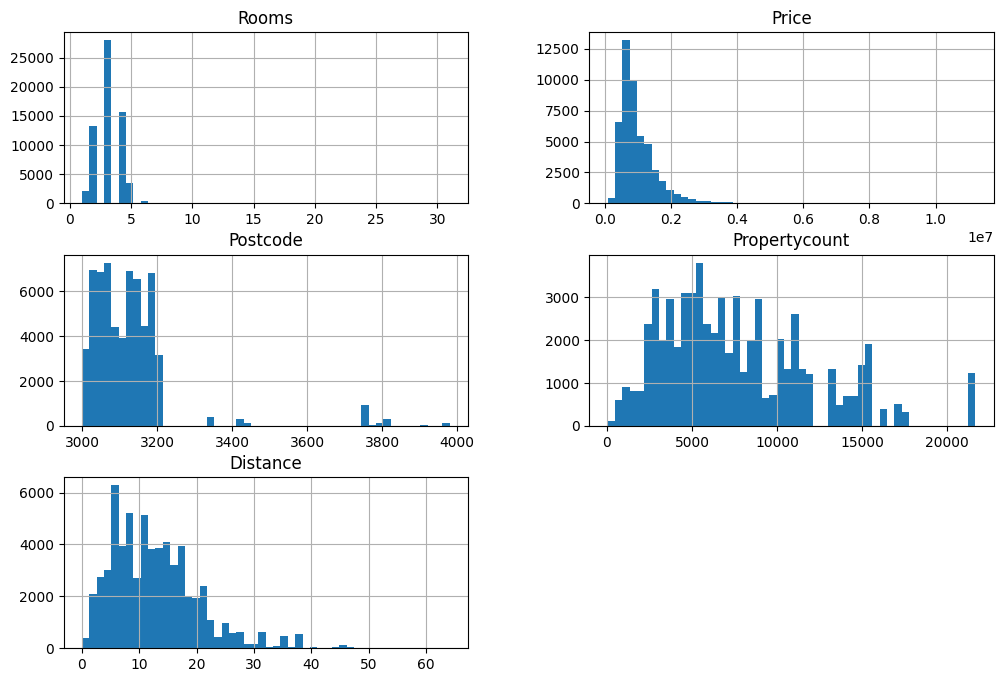

In [5]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(12,8))
plt.show()

In [6]:
# 결측치 확인
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
# 결측치가 있는 행 제거
df = data.dropna()

# 결측치 확인
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

In [8]:
#원-핫 인코딩
#df = pd.get_dummies(df, columns=['Suburb', 'Address', 'Type','Method', 'SellerG', 'Date', 'Regionname', 'CouncilArea'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder

# 문자열 열 선택
string_columns = df.select_dtypes(include=['object']).columns

# 각 문자열 열에 대해 Label Encoding 수행
for col in string_columns:
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col].astype(str))


<Axes: >

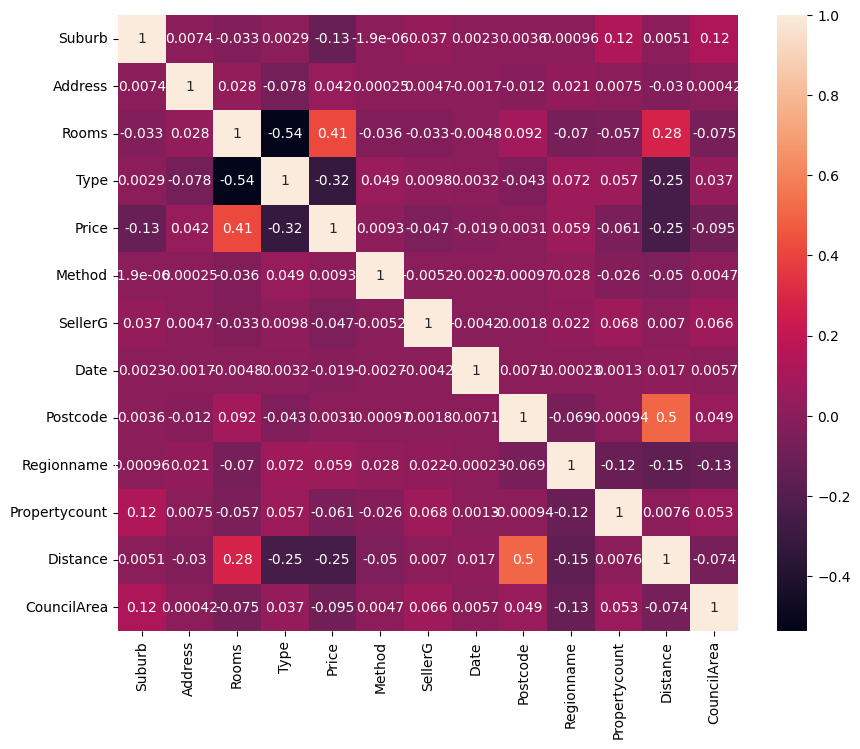

In [11]:
#히트맵
import seaborn as sns

plt.figure(figsize= (10,8))
sns.heatmap(df.corr() , annot = True)

In [12]:
# 'Price'의 기술통계 보기
print(df['Price'].describe())



count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64


In [13]:
import numpy as np

# Price 열을 기반으로 세 개의 구간을 정의
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
labels = ["low", "median", "high"]

# .loc[]를 사용하여 'binnig_price' 열에 값을 할당
df.loc[:, "binnig_price"] = pd.cut(df["Price"], bins, labels=labels, include_lowest=True)


C:\Users\Chan's Victus\AppData\Local\Temp\ipykernel_11524\2295414668.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "binnig_price"] = pd.cut(df["Price"], bins, labels=labels, include_lowest=True)


<Axes: ylabel='count'>

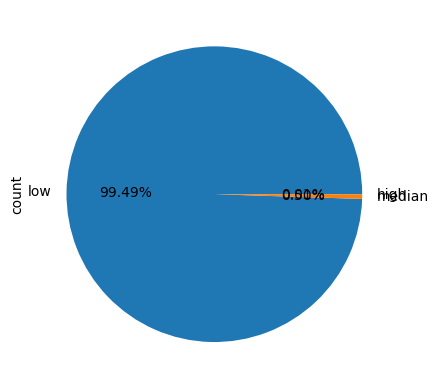

In [14]:
df["binnig_price"].value_counts().plot.pie(autopct = "%1.2f%%")

In [15]:
df1 = df[['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname', 'Price', 'Distance']].copy()


<Axes: >

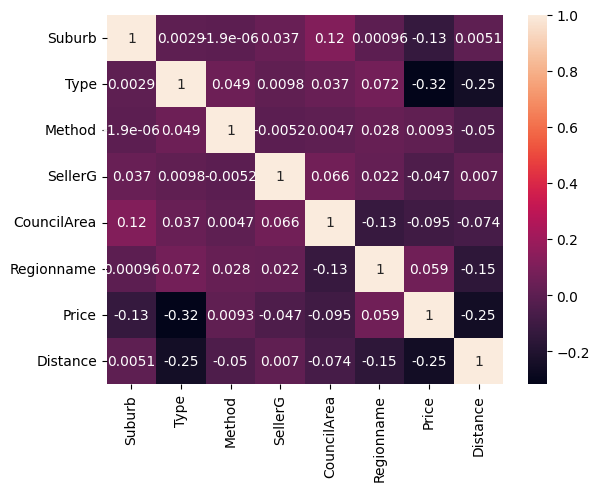

In [16]:
sns.heatmap(df1.corr() , annot = True)

In [17]:
#표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

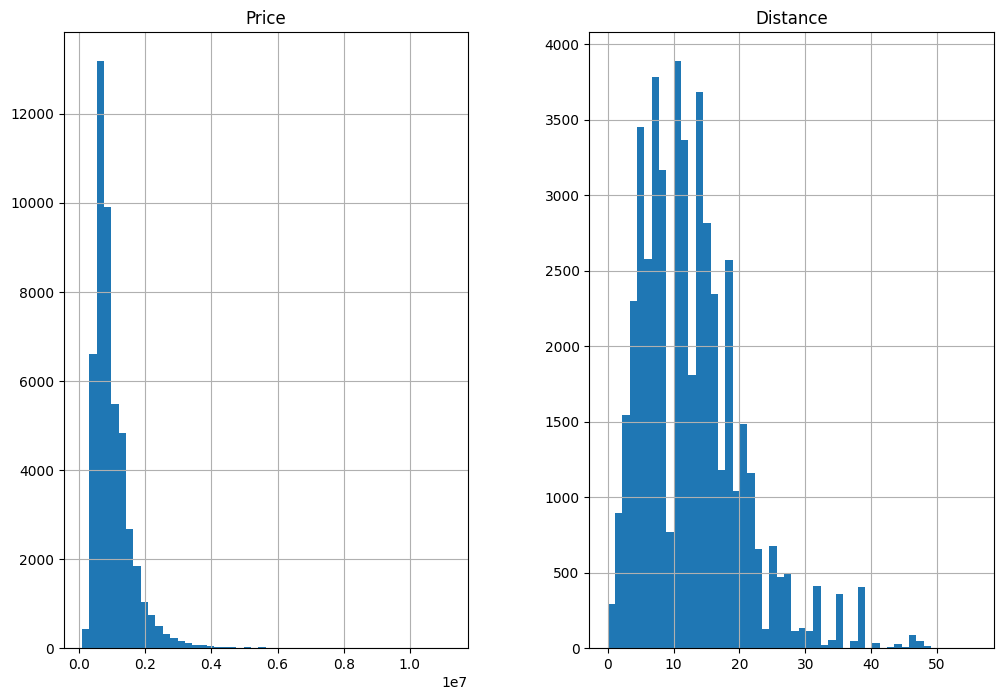

In [18]:
df1.hist(bins=50, figsize=(12,8))
plt.show()

In [19]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1)  

df1['log_Price'] = log_transformer.transform(df1[["Price"]])

# If "Distance" column exists in df1
df1['log_Distance'] = log_transformer.transform(df1[["Distance"]])


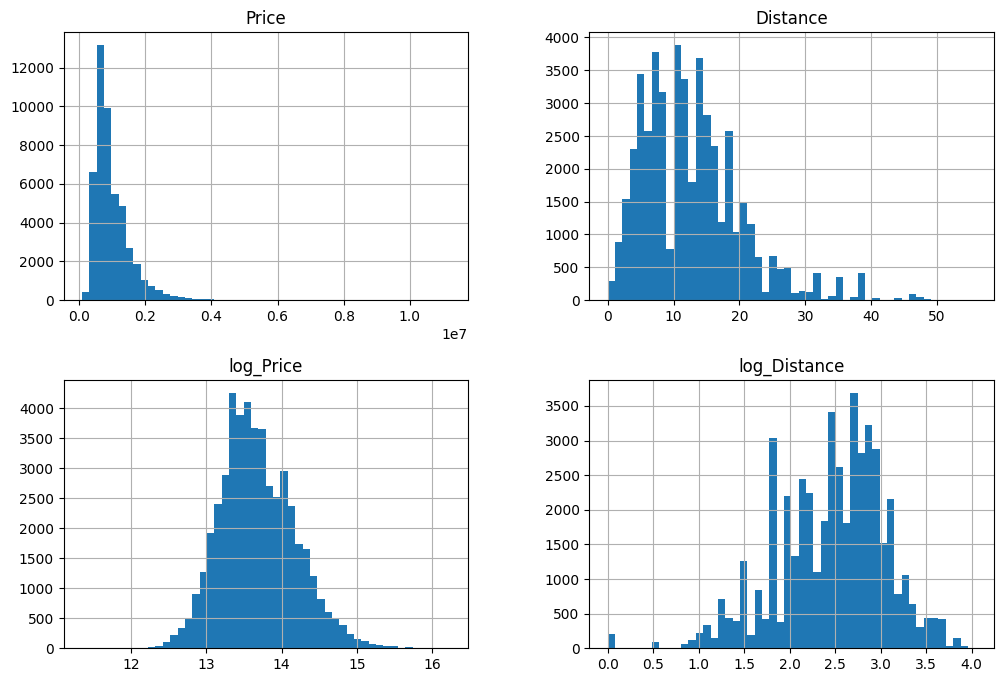

In [20]:
df1.hist(bins=50, figsize=(12,8))
plt.show()

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48433 entries, 0 to 63020
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        48433 non-null  object 
 1   Type          48433 non-null  object 
 2   Method        48433 non-null  object 
 3   SellerG       48433 non-null  object 
 4   CouncilArea   48433 non-null  object 
 5   Regionname    48433 non-null  object 
 6   Price         48433 non-null  float64
 7   Distance      48433 non-null  float64
 8   log_Price     48433 non-null  float64
 9   log_Distance  48433 non-null  float64
dtypes: float64(4), object(6)
memory usage: 4.1+ MB


In [22]:
# 1. 데이터 분할
X = df1.drop(columns=["Price", "log_Price", "Distance"])
y = df1["log_Price"]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 전처리 파이프라인
numerical_features = ["log_Distance"]
categorical_features = ["Suburb", "Type", "Method", "SellerG", "CouncilArea", "Regionname"]

numerical_transformer = Pipeline([
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("encoder", OneHotEncoder(drop="first", handle_unknown='ignore'))  # handle_unknown 추가
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])




In [27]:
# 3. 모델 훈련
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_Distance']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Suburb', 'Type', 'Method',
                                                   'SellerG', 'CouncilArea',
                                                   'Regionname'])])),
                ('rf', RandomForestRegressor(random_state=42))])

In [36]:
# 예측 및 평가
from sklearn.metrics import mean_absolute_error

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.2083


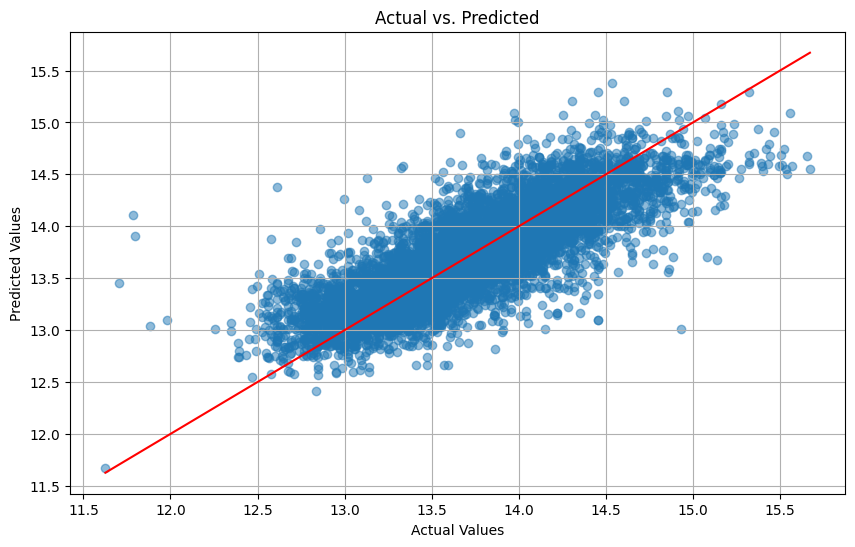

In [37]:
# 실제 값 vs. 예측 값
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 대각선
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 테스트 세트로 예측 수행
y_pred_test = pipeline.predict(X_test)

# RMSE 계산
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_test:.4f}")

# MAE 계산
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test:.4f}")

# R-squared 계산
r2_test = r2_score(y_test, y_pred_test)
print(f"R-squared on Test Set: {r2_test:.4f}")



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning: Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Root Mean Squared Error (RMSE) on Test Set: 0.2830
Mean Absolute Error (MAE) on Test Set: 0.2083
R-squared on Test Set: 0.6746
